In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
# Read Dataset
dataset = pd.read_csv("gender_classification_v7.csv")

## Data Understanding

In [3]:
dataset.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [4]:
dataset.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [6]:
dataset.shape

(5001, 8)

In [7]:
dataset.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [8]:
dataset.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

### To see relationship between Gender (Target Values) and other paramenters

In [9]:
dataset.gender.value_counts()

Female    2501
Male      2500
Name: gender, dtype: int64

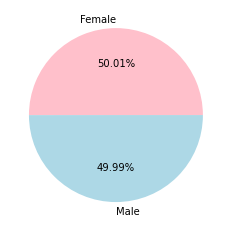

In [10]:
plt.pie(dataset['gender'].value_counts(), labels = ['Female','Male'], colors = ['pink','lightblue'], autopct='%.2f%%')
plt.show()

This dataset is a class balanced dataset with 50.01% of female and 49.99% of male which is approximately same, and this gives equal priority to each class.

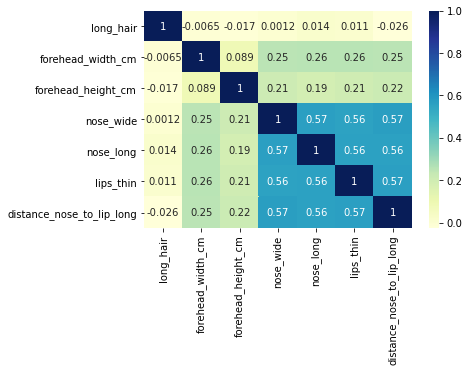

In [11]:
sns.heatmap(dataset.corr(), cmap="YlGnBu", annot = True)
plt.show()

From the heatmap, we can see that no correlation between hair length and gender.

Text(0.5, 1.0, 'width vs height of forehead')

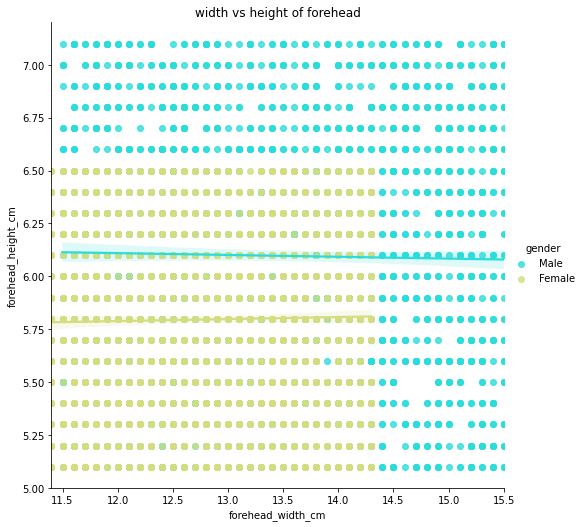

In [12]:
sns.lmplot(x="forehead_width_cm", y="forehead_height_cm", hue="gender", data=dataset, palette = 'rainbow', height = 7)
ax = plt.gca()
ax.set_title("width vs height of forehead")

This plot shows that the longer and wider the forehead, the more likely it is a male.

Text(0.5, 1.0, 'lips thin vs distance from nose to lip long')

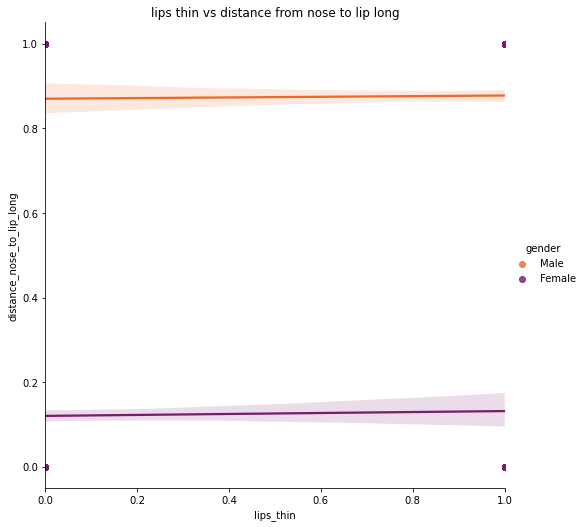

In [13]:
sns.lmplot(x="lips_thin", y="distance_nose_to_lip_long", hue="gender", data=dataset, palette = 'inferno_r', height = 7)
ax = plt.gca()
ax.set_title("lips thin vs distance from nose to lip long")

This plot shows that the division is equal and male have thinner lips and a greater distance from the lip to chin. 

Text(0.5, 1.0, 'wide vs long of nose')

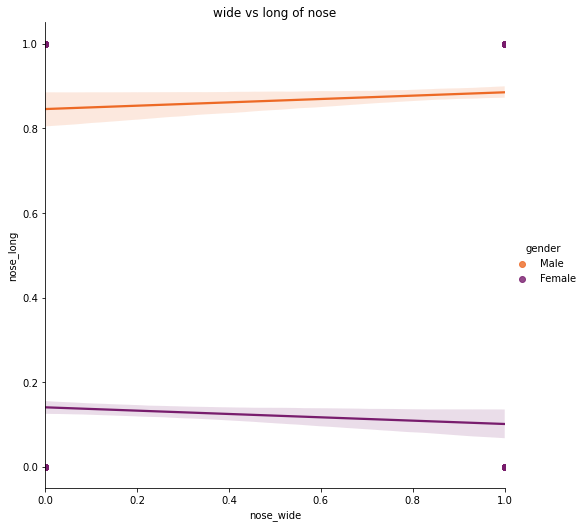

In [14]:
sns.lmplot(x="nose_wide", y="nose_long", hue="gender", data=dataset, palette = 'inferno_r', height = 7)
ax = plt.gca()
ax.set_title("wide vs long of nose")

This plot shows that the division is equal and male have longer and wider nose than female.

#### Male Analysis

In [15]:
dataset[(dataset["gender"]=="Male")].describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,0.86600,13.551440,6.096360,0.873200,0.880000,0.864800,0.876400
std,0.34072,1.187325,0.596306,0.332815,0.325027,0.342005,0.329191
min,0.00000,11.500000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.00000,12.500000,5.600000,1.000000,1.000000,1.000000,1.000000
50%,1.00000,13.600000,6.100000,1.000000,1.000000,1.000000,1.000000
75%,1.00000,14.600000,6.600000,1.000000,1.000000,1.000000,1.000000
max,1.00000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


#### Female Analysis

In [16]:
dataset[(dataset["gender"]=="Female")].describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,2501.000000,2501.000000,2501.000000,2501.000000,2501.000000,2501.000000,2501.000000
mean,0.873251,12.811675,5.796321,0.114754,0.135946,0.121551,0.121551
std,0.332758,0.876703,0.430677,0.318789,0.342799,0.326832,0.326832
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.000000,5.400000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,12.800000,5.800000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,13.600000,6.200000,0.000000,0.000000,0.000000,0.000000
max,1.000000,14.300000,6.500000,1.000000,1.000000,1.000000,1.000000


#### Average

In [17]:
average = dataset.groupby(["gender"]).mean()
average

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
gender,,,,,,,
Female,0.873251,12.811675,5.796321,0.114754,0.135946,0.121551,0.121551
Male,0.866000,13.551440,6.096360,0.873200,0.880000,0.864800,0.876400


<Figure size 1440x1440 with 0 Axes>

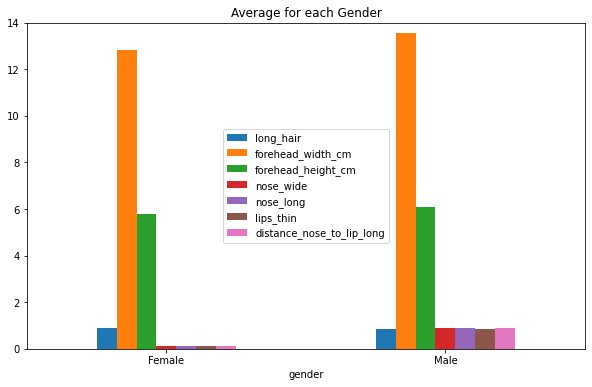

In [18]:
plt.figure(figsize=(20,20))
average2 = average.plot(kind="bar",figsize=(10,6))

for item in average2.get_xticklabels():
    item.set_rotation(0)
    
plt.ylim(0.0,14.0)
plt.legend(loc="center")
plt.title("Average for each Gender")
plt.show()

We can see that the average of all the parameters (except of long_hair) in males is higher than the females.

## Data Preparation

In [19]:
# Define Target attribute(y) and predictor attribute(x).

x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

#### Encoding the categorical data

In [20]:
Labelencoder_y = LabelEncoder()
y = Labelencoder_y.fit_transform(y)

y

array([1, 0, 1, ..., 0, 0, 1])

#### Split the dataset for testing and training

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

## Building Model - K-Nearest Neighbour Classifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier

#### To find the ideal k

In [23]:
k_r = list(range(1,26))
test_accuracy = []
for k_range in k_r:
    knn = KNeighborsClassifier(n_neighbors=k_range)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    test_accuracy.append(metrics.accuracy_score(y_test, y_pred))

test_accuracy = pd.DataFrame({"Test Accuracy":test_accuracy})
test_accuracy

,Test Accuracy
0,0.963037
1,0.958042
2,0.963037
3,0.961039
4,0.965035
5,0.963037
6,0.962038
7,0.963037
8,0.964036
9,0.965035


Text(0, 0.5, 'Testing Accuracy')

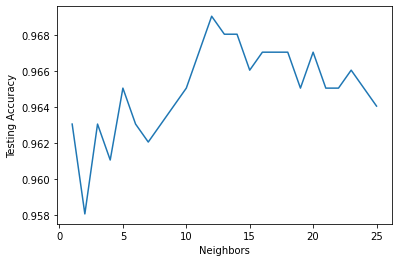

In [24]:
plt.plot(k_r, test_accuracy)
plt.xlabel("Neighbors")
plt.ylabel("Testing Accuracy")

From the above graph it can be concluded that the ideal k is K=12 because 12 having the highest accuracy -  0.9690309690309691

In [25]:
knn = KNeighborsClassifier(n_neighbors = 12, metric = "minkowski", p = 2)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=12)

#### Making Prediction

In [26]:
y_pred = knn.predict(x_test)
y_pred

array([0, 1, 1, ..., 0, 1, 0])

In [27]:
knn.predict([[ 0., 14.,  5.4, 0. , 0. ,  1. ,  0. ]])

array([0])

#### Confusion Matrix

In [28]:
knn_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix = \n", str(knn_cm))

Confusion Matrix = 
 [[508  10]
 [ 21 462]]


<AxesSubplot:>

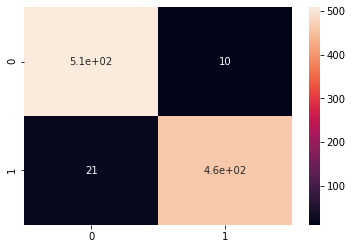

In [29]:
sns.heatmap(knn_cm, annot = True)

#### Accuracy Score

In [30]:
knn_ac=accuracy_score(y_test, y_pred)
print("Accuracy Score(%): ",knn_ac*100)

Accuracy Score(%):  96.90309690309691


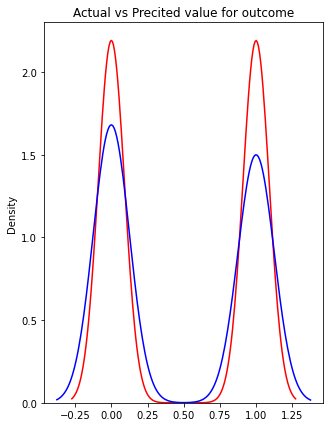

In [31]:
plt.figure(figsize=(5, 7))
ax = sns.kdeplot(y, color="red", label="Actual Value")
sns.kdeplot(y_pred, color="blue", label="Predicted Values")
plt.title('Actual vs Precited value for outcome')
plt.show()
plt.close()

## Building Model - Support Vector Machines

In [32]:
from sklearn import svm

In [33]:
svm_classifier = svm.SVC()
svm_classifier.fit(x_train, y_train)

SVC()

#### Making Prediction

In [34]:
svm_pred = svm_classifier.predict(x_test)

svm_df = pd.DataFrame({"Expected Values":y_test, "Predicted Values": svm_pred})
svm_df.head(15)

,Expected Values,Predicted Values
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
5,0,0
6,0,0
7,1,1
8,0,0
9,0,0


In [35]:
svm_classifier.predict([[ 0., 14.,  5.4, 0. , 0. ,  1. ,  0. ]])

array([0])

#### Confusion Matrix

In [36]:
svm_cm = confusion_matrix(y_test, svm_pred)
print("Confusion Matrix = \n", str(svm_cm))

Confusion Matrix = 
 [[504  14]
 [ 20 463]]


<AxesSubplot:>

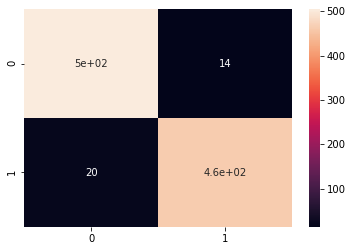

In [37]:
sns.heatmap(svm_cm, annot = True)

#### Accuracy Score

In [38]:
svm_ac = metrics.accuracy_score(y_test, svm_pred)
print("Accuracy Score(%): ",svm_ac*100)

Accuracy Score(%):  96.6033966033966


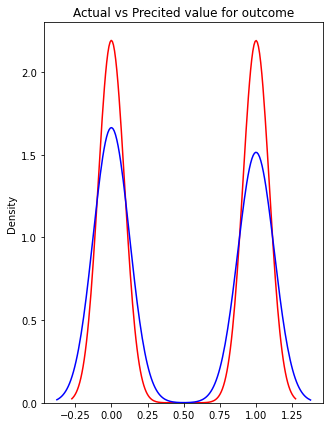

In [39]:
plt.figure(figsize=(5, 7))
ax = sns.kdeplot(y, color="red", label="Actual Value")
sns.kdeplot(svm_pred, color="blue", label="Predicted Values")
plt.title('Actual vs Precited value for outcome')
plt.show()
plt.close()

## Building Model - Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

#### Making Prediction

In [42]:
log_pred = log_reg.predict(x_test)

log_df = pd.DataFrame({"Expected Values": y_test, "Predicted Values": log_pred})
log_df.head(15)

,Expected Values,Predicted Values
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
5,0,0
6,0,0
7,1,1
8,0,0
9,0,0


In [43]:
log_reg.predict([[ 0., 14.,  5.4, 0. , 0. ,  1. ,  0. ]])

array([0])

#### Confusion Matrix

In [44]:
log_cm = confusion_matrix(y_test, log_pred)
print("Confusion Matrix = \n", str(log_cm))

Confusion Matrix = 
 [[502  16]
 [ 19 464]]


<AxesSubplot:>

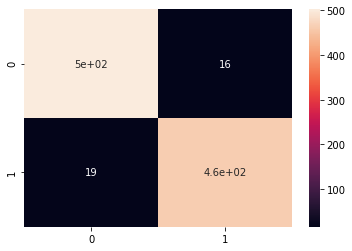

In [45]:
sns.heatmap(log_cm, annot = True)

#### Accuracy Score

In [46]:
log_ac = metrics.accuracy_score(y_test, log_pred)
print("Accuracy Score(%): ",log_ac*100)

Accuracy Score(%):  96.5034965034965


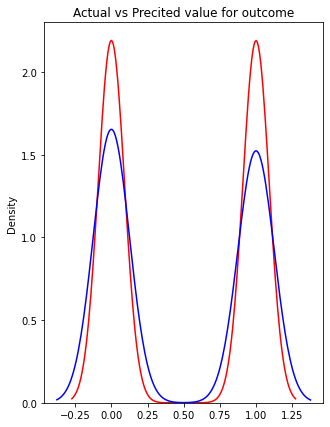

In [47]:
plt.figure(figsize=(5, 7))
ax = sns.kdeplot(y, color="red", label="Actual Value")
sns.kdeplot(log_pred, color="blue", label="Predicted Values")
plt.title('Actual vs Precited value for outcome')
plt.show()
plt.close()

## Building Model - Decision Tree Classifier

In [48]:
from sklearn import tree

In [49]:
dt = tree.DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

#### Making Prediction

In [50]:
dt_pred = dt.predict(x_test)

dt_df = pd.DataFrame({"Expected Values": y_test, "Predicted Values": dt_pred})
dt_df.head(15)

,Expected Values,Predicted Values
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
5,0,0
6,0,0
7,1,1
8,0,0
9,0,0


In [51]:
dt.predict([[ 0., 14.,  5.4, 0. , 0. ,  1. ,  0. ]])

array([0])

#### Confusion Matrix

In [52]:
dt_cm = confusion_matrix(y_test, dt_pred)
print("Confusion Matrix = \n", str(dt_cm))

Confusion Matrix = 
 [[501  17]
 [ 24 459]]


<AxesSubplot:>

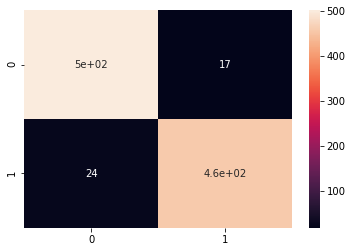

In [53]:
sns.heatmap(dt_cm, annot = True)

#### Accuracy Score

In [54]:
dt_ac = metrics.accuracy_score(y_test, dt_pred)
print("Accuracy Score(%): ",dt_ac*100)

Accuracy Score(%):  95.90409590409591


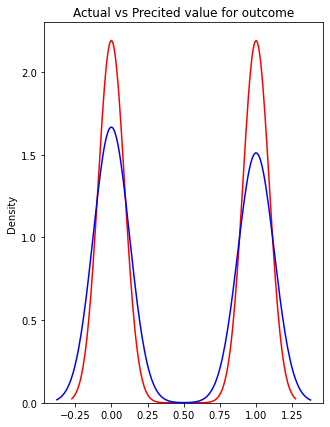

In [55]:
plt.figure(figsize=(5, 7))
ax = sns.kdeplot(y, color="red", label="Actual Value")
sns.kdeplot(dt_pred, color="blue", label="Predicted Values")
plt.title('Actual vs Precited value for outcome')
plt.show()
plt.close()

### Compare with different models

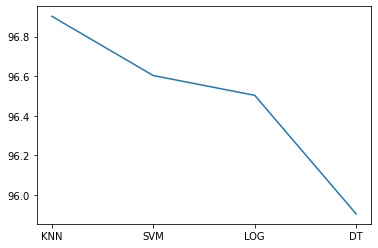

In [56]:
xpoints = np.array(['KNN', 'SVM','LOG','DT'])
ypoints = np.array([knn_ac*100, svm_ac*100, log_ac*100, dt_ac*100])

plt.plot(xpoints, ypoints)
plt.show()

In [57]:
table = pd.DataFrame({'Models':['KNN','SVM','LOG','DT'], 
                      'Accuracy Score':[knn_ac*100, svm_ac*100, log_ac*100, dt_ac*100]});
print(table)

  Models  Accuracy Score
0    KNN       96.903097
1    SVM       96.603397
2    LOG       96.503497
3     DT       95.904096


In the model training and the above plot, it can be seen that the accuracy percentage of all models are relatively high - exceed 95% for all models. As a result, KNN model is probably a better choice as it provides highest accuracy percentage (96.9%) with better precision.